In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
daily = pd.read_csv("./csv/daily_data.csv")

In [3]:
summ = pd.read_csv("./csv/summary_data.csv")

In [4]:
vacc = pd.read_csv("./csv/1/country_vaccinations.csv")

In [5]:
vacc2 = pd.read_csv("./csv/1/country_vaccinations_by_manufacturer.csv")

In [6]:
daily.head() #check the first 5 rows of data

,date,country,cumulative_total_cases,daily_new_cases,active_cases,cumulative_total_deaths,daily_new_deaths
0,2020-2-15,Afghanistan,0.0,NaN,0.0,0.0,NaN
1,2020-2-16,Afghanistan,0.0,NaN,0.0,0.0,NaN
2,2020-2-17,Afghanistan,0.0,NaN,0.0,0.0,NaN
3,2020-2-18,Afghanistan,0.0,NaN,0.0,0.0,NaN
4,2020-2-19,Afghanistan,0.0,NaN,0.0,0.0,NaN


In [7]:
summ.head() #check the first 5 rows of data

,country,continent,total_confirmed,total_deaths,total_recovered,active_cases,serious_or_critical,total_cases_per_1m_population,total_deaths_per_1m_population,total_tests,total_tests_per_1m_population,population
0,Afghanistan,Asia,179267,7690.0,162202.0,9375.0,1124.0,4420,190.0,951337.0,23455.0,40560636
1,Albania,Europe,275574,3497.0,271826.0,251.0,2.0,95954,1218.0,1817530.0,632857.0,2871945
2,Algeria,Africa,265816,6875.0,178371.0,80570.0,6.0,5865,152.0,230861.0,5093.0,45325517
3,Andorra,Europe,42156,153.0,41021.0,982.0,14.0,543983,1974.0,249838.0,3223924.0,77495
4,Angola,Africa,99194,1900.0,97149.0,145.0,NaN,2853,55.0,1499795.0,43136.0,34769277


In [8]:
vacc2.head()

,location,date,vaccine,total_vaccinations
0,Argentina,29/12/2020,Moderna,2
1,Argentina,29/12/2020,Oxford/AstraZeneca,3
2,Argentina,29/12/2020,Sinopharm/Beijing,1
3,Argentina,29/12/2020,Sputnik V,20481
4,Argentina,30/12/2020,Moderna,2


In [9]:
vacc.head()

,country,iso_code,date,total_vaccinations,people_vaccinated,people_fully_vaccinated,daily_vaccinations_raw,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,daily_vaccinations_per_million,vaccines,source_name,source_website
0,Afghanistan,AFG,2021-02-22,0.0,0.0,NaN,NaN,NaN,0.0,0.0,NaN,NaN,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...",World Health Organization,https://covid19.who.int/
1,Afghanistan,AFG,2021-02-23,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,34.0,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...",World Health Organization,https://covid19.who.int/
2,Afghanistan,AFG,2021-02-24,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,34.0,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...",World Health Organization,https://covid19.who.int/
3,Afghanistan,AFG,2021-02-25,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,34.0,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...",World Health Organization,https://covid19.who.int/
4,Afghanistan,AFG,2021-02-26,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,34.0,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...",World Health Organization,https://covid19.who.int/


In [10]:
daily.sort_values(by=['country'], inplace=True)
daily

,date,country,cumulative_total_cases,daily_new_cases,active_cases,cumulative_total_deaths,daily_new_deaths
0,2020-2-15,Afghanistan,0.0,NaN,0.0,0.0,NaN
541,2021-8-09,Afghanistan,151013.0,235.0,40104.0,6961.0,25.0
542,2021-8-10,Afghanistan,151291.0,278.0,40008.0,6978.0,17.0
543,2021-8-11,Afghanistan,151563.0,272.0,39547.0,6988.0,10.0
544,2021-8-12,Afghanistan,151770.0,207.0,39280.0,7000.0,12.0
...,...,...,...,...,...,...,...
184242,2020-11-16,Zimbabwe,8897.0,68.0,524.0,257.0,0.0
184243,2020-11-17,Zimbabwe,8945.0,48.0,521.0,260.0,3.0
184244,2020-11-18,Zimbabwe,8981.0,36.0,536.0,261.0,1.0
184234,2020-11-08,Zimbabwe,8531.0,33.0,273.0,253.0,2.0


In [11]:
n_by_state = summ.groupby("country", as_index=False)[["total_deaths", "total_recovered"]].sum().sort_values(by='total_deaths',ascending=False).head(10)
n_by_state.head()

,country,total_deaths,total_recovered
212,USA,1026646.0,81244260.0
26,Brazil,664920.0,29718402.0
94,India,524214.0,42579693.0
165,Russia,377670.0,17647179.0
131,Mexico,324465.0,5044893.0


Text(0, 0.5, 'Total Deaths')

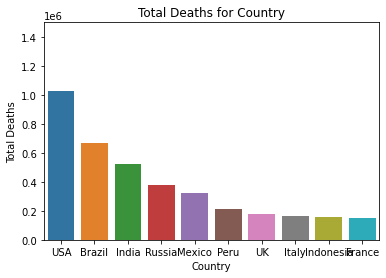

In [12]:
ls = sns.barplot(data=n_by_state, x="country", y="total_deaths")
po = ls.set_title( "Total Deaths for Country")
ls.set_ylim(0, 1500000)
plt.xlabel("Country") #update the axes
plt.ylabel("Total Deaths")


In [ ]:
#Most used vaccine for location

In [22]:
BestV = vacc2[['location', 'vaccine', 'total_vaccinations']].groupby(["location","vaccine"]).sum().sort_values(by='total_vaccinations', ascending=False).reset_index()

BestV.head()

,location,vaccine,total_vaccinations
0,European Union,Pfizer/BioNTech,141033652111
1,United States,Pfizer/BioNTech,79776473000
2,United States,Moderna,55294886137
3,Germany,Pfizer/BioNTech,29153644591
4,France,Pfizer/BioNTech,25225323599


In [21]:
# Change data type column

In [15]:
vacc2['date']= pd.to_datetime(vacc2['date'])
vacc2.dtypes

C:\Users\got_a\AppData\Local\Programs\Python\Python310\lib\site-packages\pandas\core\tools\datetimes.py:1047: UserWarning: Parsing '29/12/2020' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  cache_array = _maybe_cache(arg, format, cache, convert_listlike)
C:\Users\got_a\AppData\Local\Programs\Python\Python310\lib\site-packages\pandas\core\tools\datetimes.py:1047: UserWarning: Parsing '30/12/2020' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  cache_array = _maybe_cache(arg, format, cache, convert_listlike)
C:\Users\got_a\AppData\Local\Programs\Python\Python310\lib\site-packages\pandas\core\tools\datetimes.py:1047: UserWarning: Parsing '31/12/2020' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  cache_array = _maybe_cache(arg, format, cache, convert_listlike)
C:\Users\got_a\AppData\Local\Programs\Python\Python310\lib\site-packag

location                      object
date                  datetime64[ns]
vaccine                       object
total_vaccinations             int64
dtype: object

In [16]:
vacc2["date"].dt.year

0        2020
1        2020
2        2020
3        2020
4        2020
         ... 
35618    2022
35619    2022
35620    2022
35621    2022
35622    2022
Name: date, Length: 35623, dtype: int64